<a href="https://colab.research.google.com/github/Bhavanavaddadi/prediction-model--breast-cancer/blob/main/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset from Scikit-learn
from sklearn.datasets import load_breast_cancer

# Load the data
cancer = load_breast_cancer()

# Create a pandas DataFrame for easier analysis
# The data is in cancer.data and column names are in cancer.feature_names
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add the target variable to the DataFrame
# 0 = Malignant, 1 = Benign
df['target'] = cancer.target

print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# Get a concise summary of the dataframe
print("Dataframe Info ")
df.info()

# Check for missing values in each column
print("\nMissing Values ")
print(df.isnull().sum())

# Get descriptive statistics for each numerical column
print("\nDescriptive Statistics ")
print(df.describe())

--- Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smo

/tmp/ipython-input-243105448.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


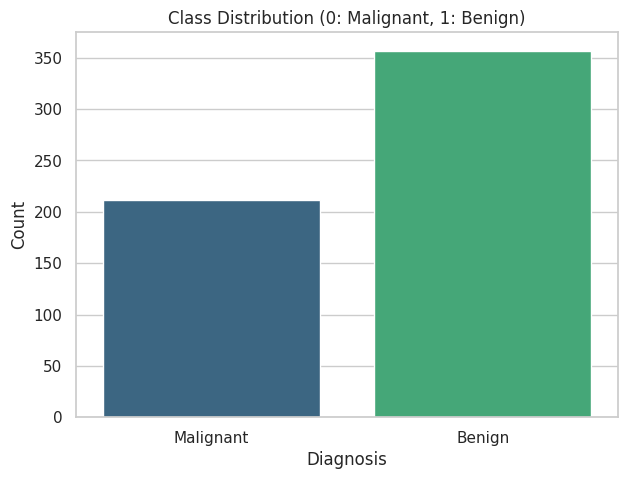

target
1    357
0    212
Name: count, dtype: int64


In [23]:
# Visualize the distribution of the target variable
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Class Distribution (0: Malignant, 1: Benign)')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Print the exact numbers
print(df['target'].value_counts())

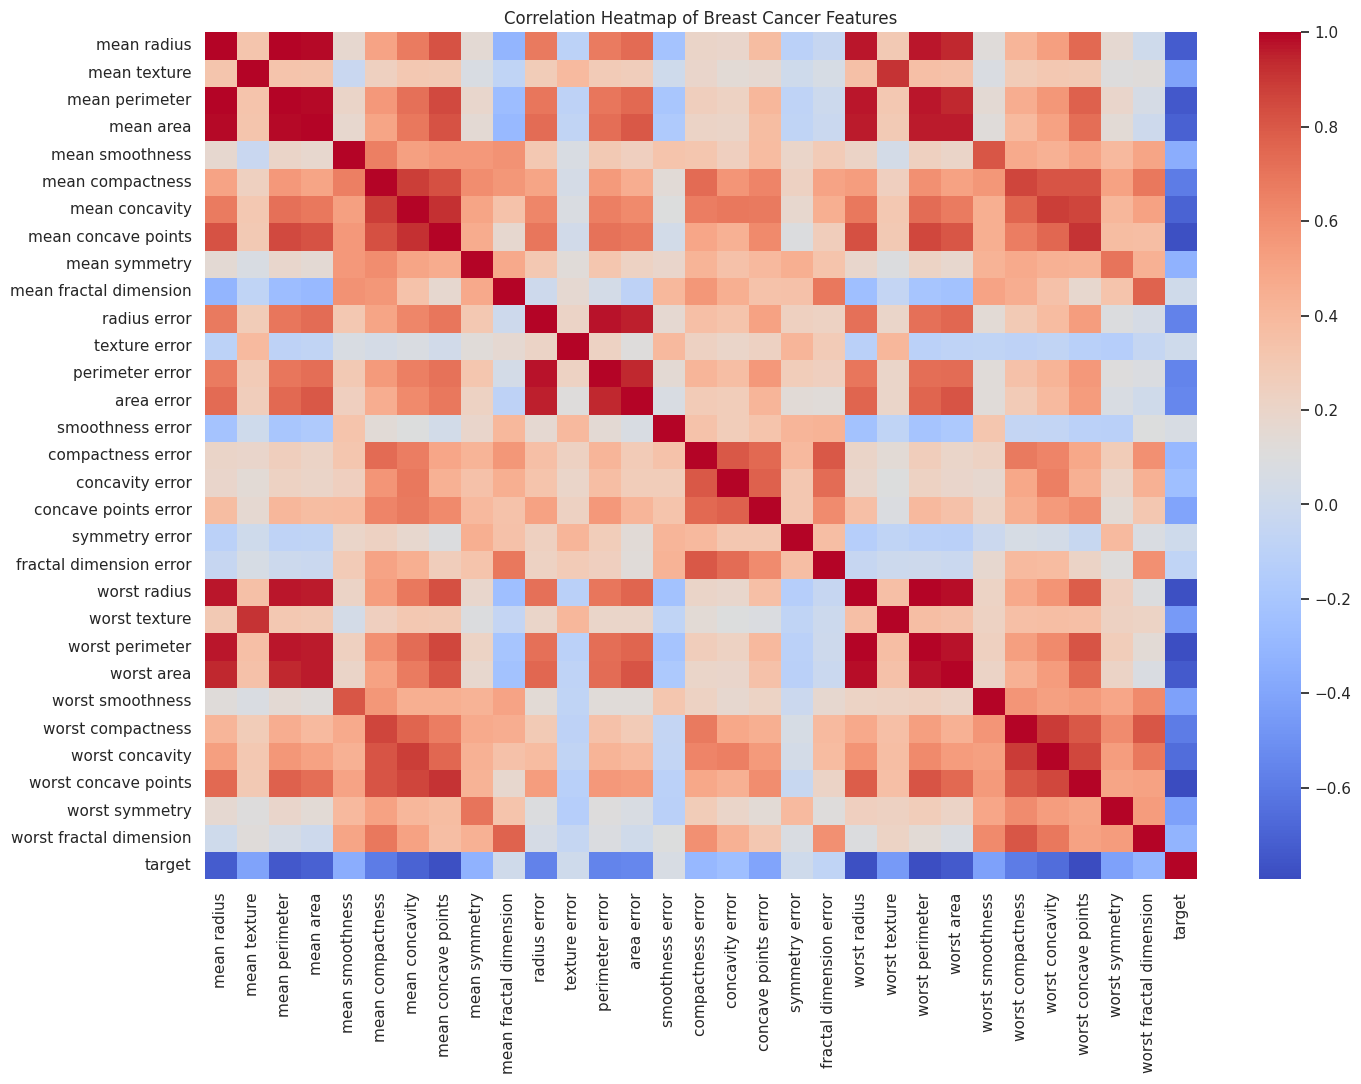

In [24]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(16, 11))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()

/tmp/ipython-input-3004681680.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='pastel')
/tmp/ipython-input-3004681680.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='pastel')
/tmp/ipython-input-3004681680.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='pastel')
/tmp/ipython-input-3004681680.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

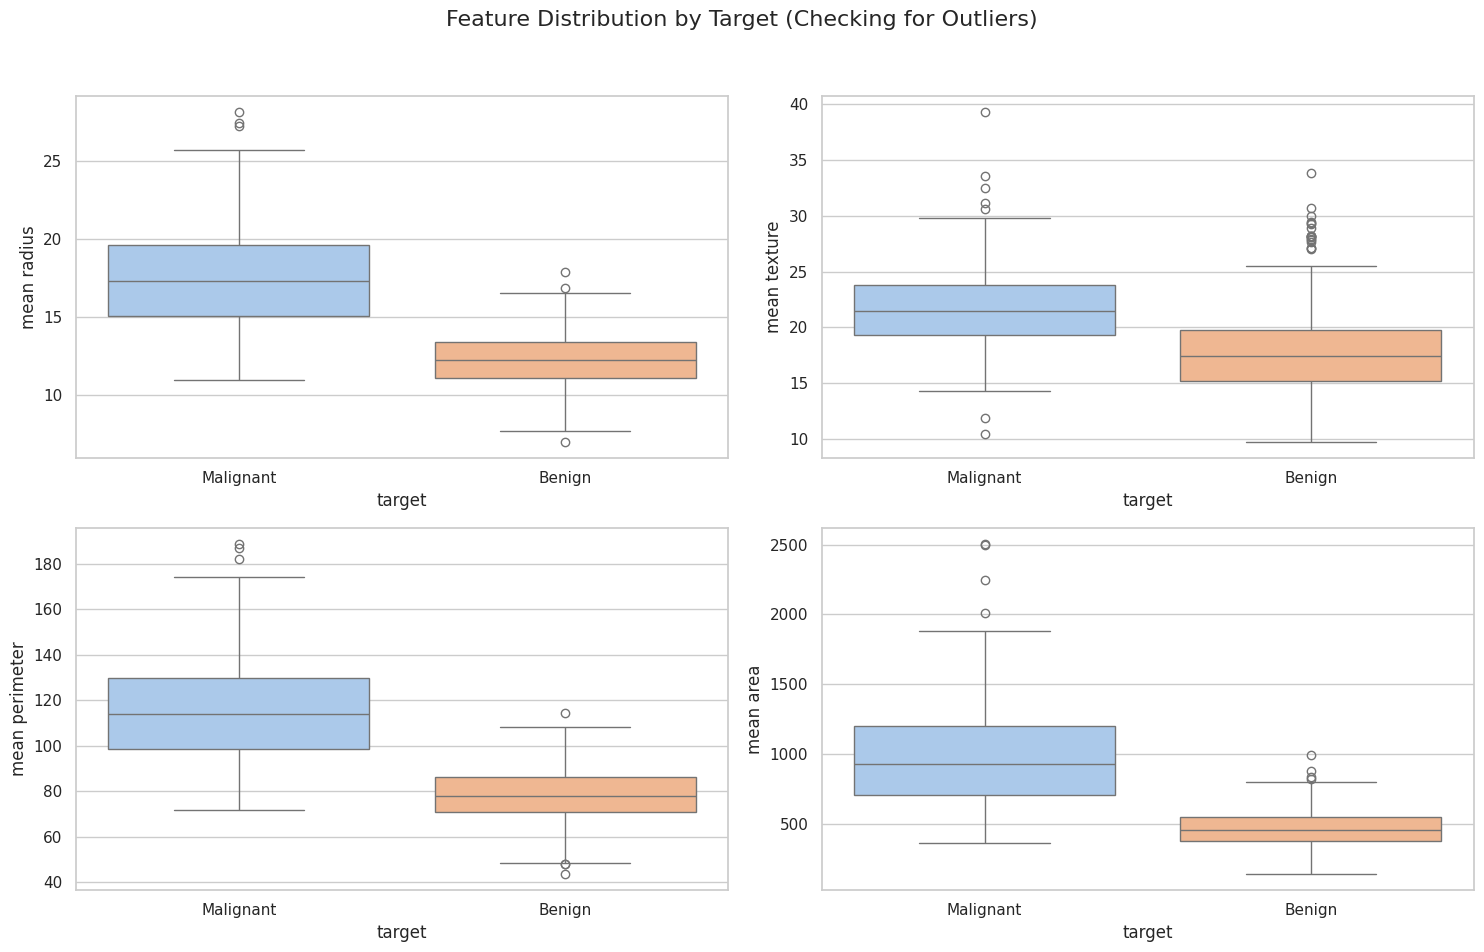

In [25]:
# Let's look at a few key features for outliers
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target', y=feature, data=df, palette='pastel')
    plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.suptitle('Feature Distribution by Target (Checking for Outliers)', size=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [26]:
#data proccessing bit
#splitting data into training and testing set
from sklearn.model_selection import train_test_split

# X contains all the feature columns
X = df.drop('target', axis=1)

# y contains only the target column
y = df['target']

# Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (455, 30)
X_test shape: (114, 30)


In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data to learn the mean and standard deviation
scaler.fit(X_train)

# Transform both the training and testing data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data has been successfully scaled.")
# To see the effect, compare the first row before and after scaling
print("\nOriginal first row:\n", X_train.iloc[0].values)
print("\nScaled first row:\n", X_train_scaled[0])

Data has been successfully scaled.

Original first row:
 [9.029e+00 1.733e+01 5.879e+01 2.505e+02 1.066e-01 1.413e-01 3.130e-01
 4.375e-02 2.111e-01 8.046e-02 3.274e-01 1.194e+00 1.885e+00 1.767e+01
 9.549e-03 8.606e-02 3.038e-01 3.322e-02 4.197e-02 9.559e-03 1.031e+01
 2.265e+01 6.550e+01 3.247e+02 1.482e-01 4.365e-01 1.252e+00 1.750e-01
 4.228e-01 1.175e-01]

Scaled first row:
 [-1.44075296 -0.43531947 -1.36208497 -1.1391179   0.78057331  0.71892128
  2.82313451 -0.11914956  1.09266219  2.45817261 -0.26380039 -0.01605246
 -0.47041357 -0.47476088  0.83836493  3.25102691  8.43893667  3.39198733
  2.62116574  2.06120787 -1.23286131 -0.47630949 -1.24792009 -0.97396758
  0.72289445  1.18673232  4.67282796  0.9320124   2.09724217  1.88645014]


✅ Logistic Regression model trained.
--- 🤖 Logistic Regression Results ---
Accuracy: 0.9737
Classification Report:
               precision    recall  f1-score   support

Malignant (0)       0.98      0.95      0.96        43
   Benign (1)       0.97      0.99      0.98        71

     accuracy                           0.97       114
    macro avg       0.97      0.97      0.97       114
 weighted avg       0.97      0.97      0.97       114



Text(216.25, 0.5, 'Actual')

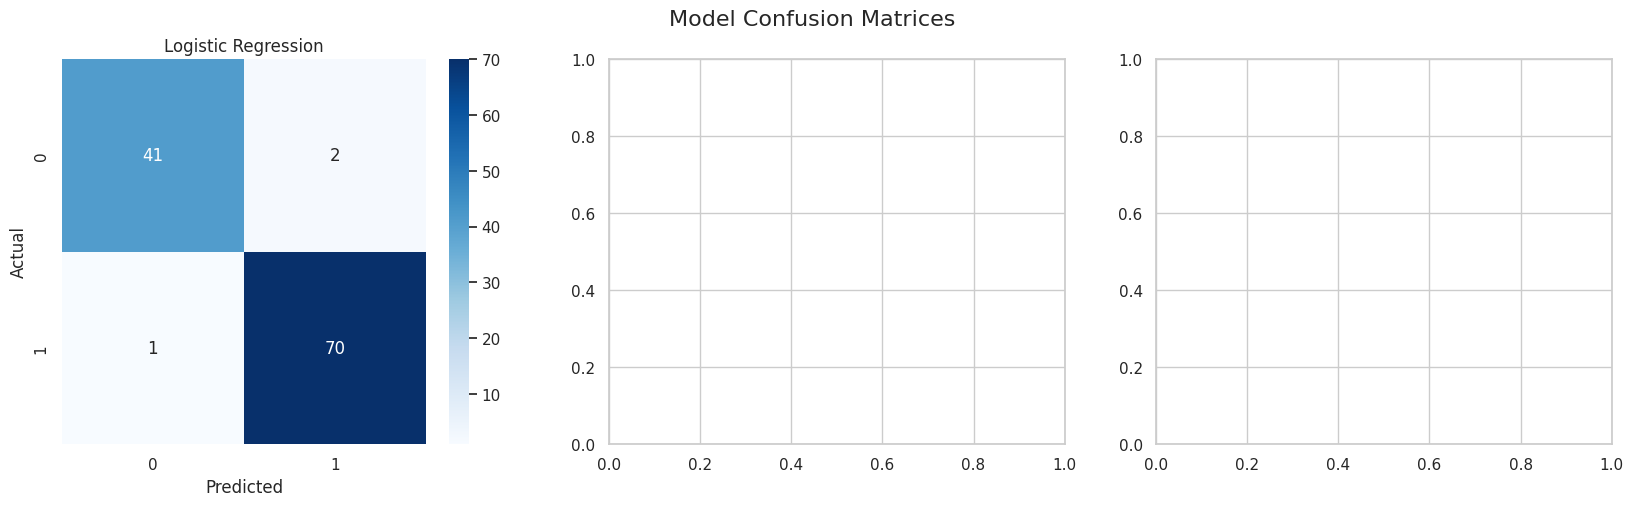

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
print("✅ Logistic Regression model trained.")
# 2. Make Predictions on the Test Set

y_pred_log_reg = log_reg.predict(X_test_scaled)
print("--- 🤖 Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Malignant (0)', 'Benign (1)']))
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Model Confusion Matrices', fontsize=16)

# Logistic Regression Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

✅ SVM model trained.

--- 🤖 Support Vector Machine (SVM) Results ---
Accuracy: 0.9825
Classification Report:
               precision    recall  f1-score   support

Malignant (0)       1.00      0.95      0.98        43
   Benign (1)       0.97      1.00      0.99        71

     accuracy                           0.98       114
    macro avg       0.99      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114



Text(763.3088235294118, 0.5, 'Actual')

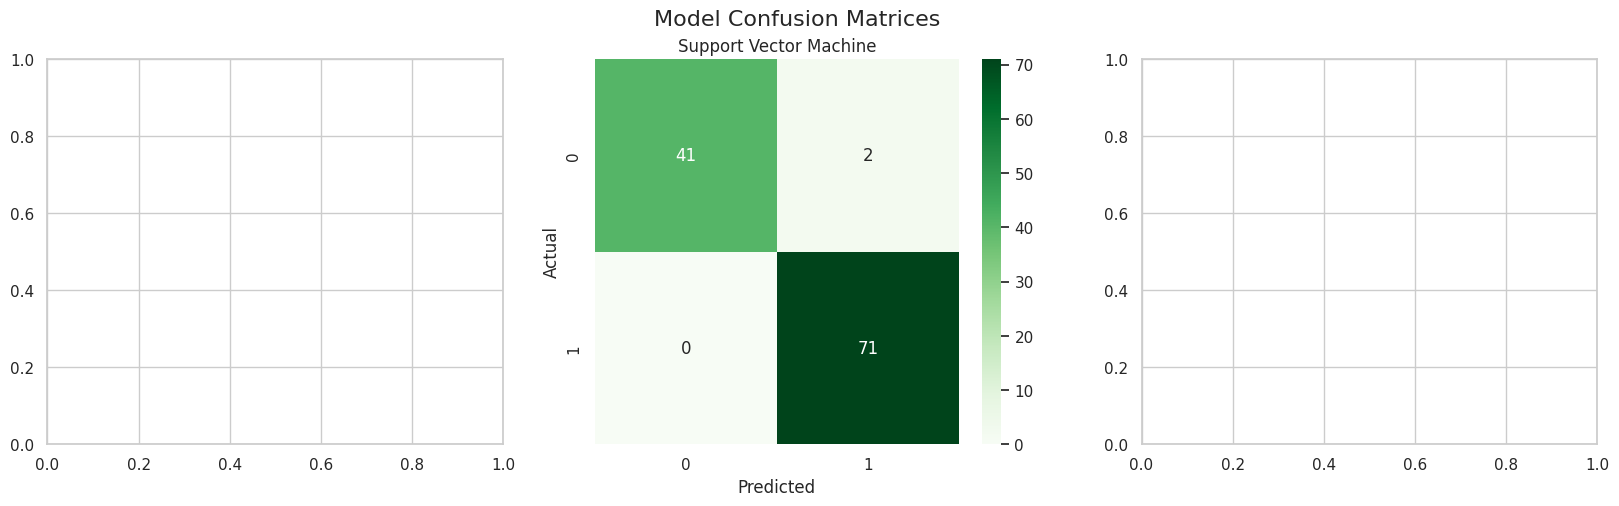

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
print("✅ SVM model trained.")
y_pred_svm = svm_model.predict(X_test_scaled)
#  Support Vector Machine (SVM)
print("\n--- 🤖 Support Vector Machine (SVM) Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Malignant (0)', 'Benign (1)']))
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Model Confusion Matrices', fontsize=16)
# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Support Vector Machine')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')


✅ Random Forest model trained.


--- 🤖 Random Forest Results ---
Accuracy: 0.9649
Classification Report:
               precision    recall  f1-score   support

Malignant (0)       0.98      0.93      0.95        43
   Benign (1)       0.96      0.99      0.97        71

     accuracy                           0.96       114
    macro avg       0.97      0.96      0.96       114
 weighted avg       0.97      0.96      0.96       114



Text(1310.3676470588236, 0.5, 'Actual')

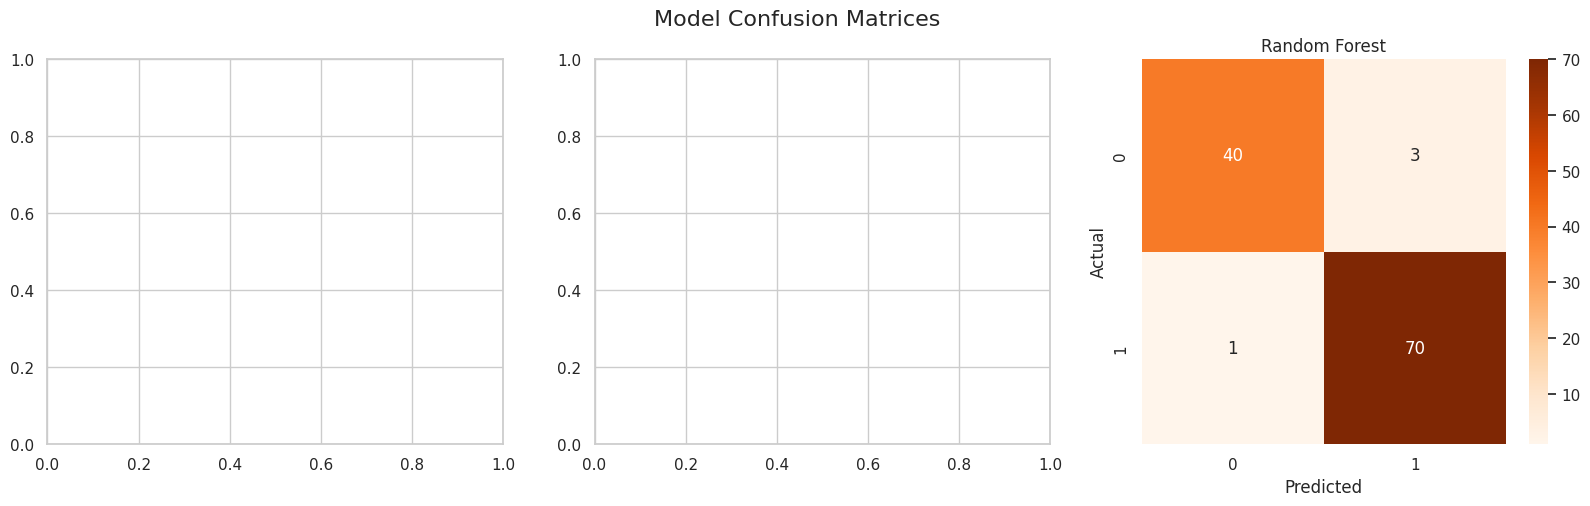

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
print("✅ Random Forest model trained.\n")
y_pred_rf = rf_model.predict(X_test_scaled)
# --- Random Forest ---
print("\n--- 🤖 Random Forest Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Malignant (0)', 'Benign (1)']))
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Model Confusion Matrices', fontsize=16)
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')


✅ Logistic Regression model trained.
✅ SVM model trained.
✅ Random Forest model trained.

--- 🤖 Logistic Regression Results ---
Accuracy: 0.9737
Classification Report:
               precision    recall  f1-score   support

Malignant (0)       0.98      0.95      0.96        43
   Benign (1)       0.97      0.99      0.98        71

     accuracy                           0.97       114
    macro avg       0.97      0.97      0.97       114
 weighted avg       0.97      0.97      0.97       114


--- 🤖 Support Vector Machine (SVM) Results ---
Accuracy: 0.9825
Classification Report:
               precision    recall  f1-score   support

Malignant (0)       1.00      0.95      0.98        43
   Benign (1)       0.97      1.00      0.99        71

     accuracy                           0.98       114
    macro avg       0.99      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114


--- 🤖 Random Forest Results ---
Accuracy: 0.9649
Classification Report:
     

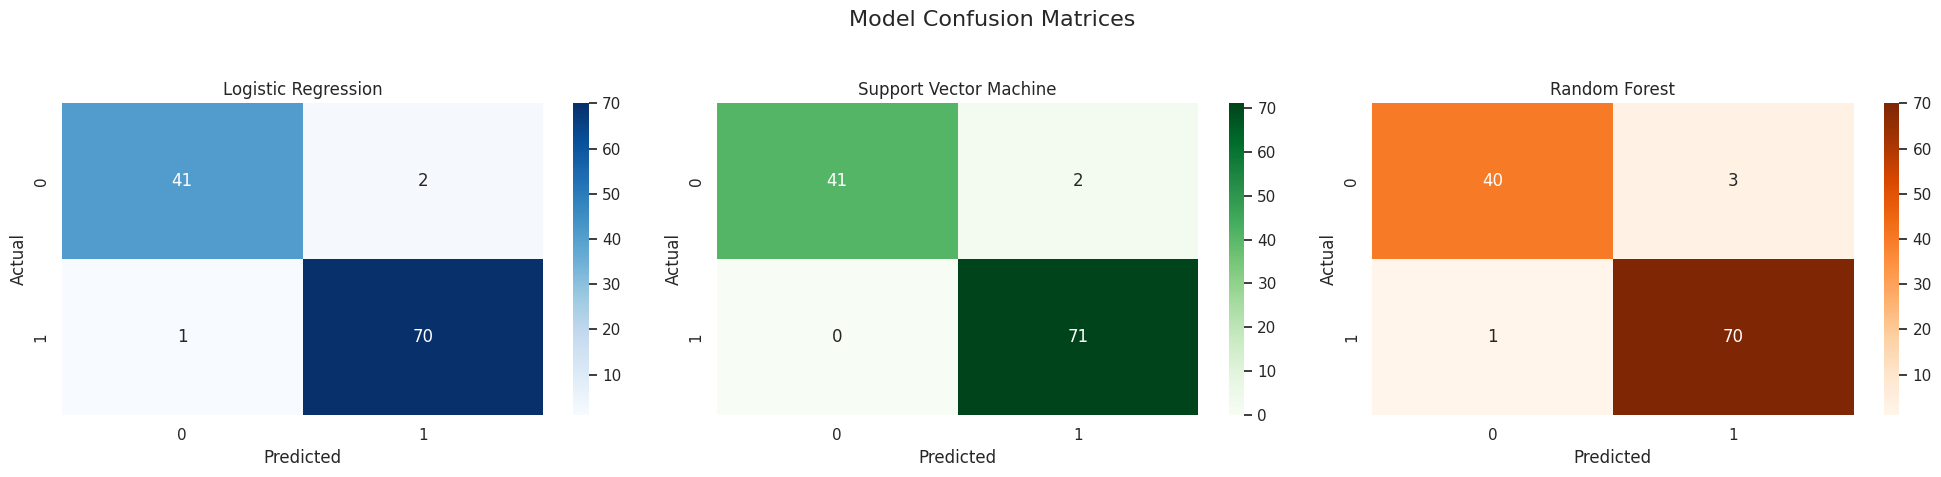


--- 📊 Final Model Comparison ---
                     Accuracy  Malignant Recall
Model                                          
Logistic Regression  0.973684          0.953488
SVM                  0.982456          0.953488
Random Forest        0.964912          0.930233


In [31]:
# Import the models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# 1. Initialize and Train the Models


# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
print("✅ Logistic Regression model trained.")

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
print("✅ SVM model trained.")

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
print("✅ Random Forest model trained.\n")


# 2. Make Predictions on the Test Set

y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)


# 3. Evaluate and Print Results for Each Model


# Logistic Regression
print("--- 🤖 Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Malignant (0)', 'Benign (1)']))

# Support Vector Machine (SVM)
print("\n--- 🤖 Support Vector Machine (SVM) Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Malignant (0)', 'Benign (1)']))

#  Random Forest
print("\n 🤖 Random Forest Results ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Malignant (0)', 'Benign (1)']))



# 4. Visualize Confusion Matrices for Comparison

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Model Confusion Matrices', fontsize=16)

# Logistic Regression Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Support Vector Machine')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 5. Final Comparison Summary Table

# Extracting recall for the 'Malignant' class (class 0) from the classification reports
report_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

summary = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Malignant Recall': [
        report_log_reg['0']['recall'],
        report_svm['0']['recall'],
        report_rf['0']['recall']
    ]
}

summary_df = pd.DataFrame(summary).set_index('Model')
print("\n--- 📊 Final Model Comparison ---")
print(summary_df)

In [40]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

# Step 0: Recreate the necessary variables for this example
# Load the dataset to get feature names and create train/test sets
cancer = load_breast_cancer()
X = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




# FIX 1: Re-train the SVM Model with probability=True

# This is the crucial change. You must create the model this way.
print("Re-training the SVM model with 'probability=True'...")
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
print("Model trained successfully.\n")




# Step 1: Create a hypothetical new data point
new_patient_data_list = [[
    17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003,
    0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601,
    0.1189
]]

#  Create a DataFrame with feature names to resolve the UserWarning
new_patient_df = pd.DataFrame(new_patient_data_list, columns=X.columns)


# Step 2: Use the SAME fitted scaler to transform the new data
new_patient_scaled = scaler.transform(new_patient_df)

# Step 3: Make the prediction (this will now work)
prediction = svm_model.predict(new_patient_scaled)
prediction_probability = svm_model.predict_proba(new_patient_scaled)

# Step 4: Interpret the result
print("--- Prediction for New Patient ---")
if prediction[0] == 0:
    print("Prediction: Malignant (Class 0)")
else:
    print("Prediction: Benign (Class 1)")

# The output of predict_proba is [prob_class_0, prob_class_1]
print(f"\nPrediction Confidence:")
print(f"  - Probability of Malignant (0): {prediction_probability[0][0]:.2%}")
print(f"  - Probability of Benign (1):    {prediction_probability[0][1]:.2%}")

Re-training the SVM model with 'probability=True'...
Model trained successfully.

--- Prediction for New Patient ---
Prediction: Malignant (Class 0)

Prediction Confidence:
  - Probability of Malignant (0): 98.43%
  - Probability of Benign (1):    1.57%


In [35]:
import joblib
import numpy as np



# Step 1: Load the saved model and scaler
loaded_model = joblib.load('svm_breast_cancer_model.joblib')
loaded_scaler = joblib.load('data_scaler.joblib')
print("Model and scaler loaded successfully.")

# Step 2: Use them on new data (using the same example as before)
new_patient_data = np.array([[
    17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003,
    0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601,
    0.1189
]])

# Step 3: Transform and Predict
new_patient_scaled = loaded_scaler.transform(new_patient_data)
final_prediction = loaded_model.predict(new_patient_scaled)

# Step 4: Show the final result
print("\n--- Prediction using Loaded Model ---")
if final_prediction[0] == 0:
    print("Prediction: Malignant (Class 0)")
else:
    print("Prediction: Benign (Class 1)")

Model and scaler loaded successfully.

--- Prediction using Loaded Model ---
Prediction: Malignant (Class 0)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
import joblib
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# This is needed to get the column names for our DataFrame
from sklearn.datasets import load_breast_cancer

In [37]:
# Load the saved model and scaler
try:
    model = joblib.load('svm_breast_cancer_model.joblib')
    scaler = joblib.load('data_scaler.joblib')

    # Get the feature names from the original dataset
    cancer = load_breast_cancer()
    feature_names = cancer.feature_names

    print("✅ Model and scaler loaded successfully.")
except FileNotFoundError:
    print("❌ Error: Make sure 'svm_breast_cancer_model.joblib' and 'data_scaler.joblib' files are present.")
    model = None

✅ Model and scaler loaded successfully.


In [39]:
# Create the widgets for our interface
# A text area to input the 30 feature values, separated by commas
input_text = widgets.Textarea(
    value='',
    placeholder='Paste 30 comma-separated feature values here...',
    description='Patient Data:',
    layout={'width': '90%', 'height': '100px'},
    disabled=False
)

# A button to trigger the prediction
predict_button = widgets.Button(
    description='Predict',
    button_style='success',
    tooltip='Click to predict diagnosis',
    icon='check'
)

# An output widget to display the results
output_area = widgets.Output()

# Define the function that runs when the button is clicked
def on_predict_button_clicked(b):
    with output_area:
        clear_output() # Clear previous results

        # 1. Get the input string and split it by commas
        input_string = input_text.value
        if not input_string:
            print("❌ Please paste patient data into the text box.")
            return

        try:
            # 2. Convert the string values to a list of floats
            values = [float(x.strip()) for x in input_string.split(',')]

            # 3. Check if we have exactly 30 features
            if len(values) != 30:
                print(f"❌ Error: Expected 30 feature values, but received {len(values)}.")
                return

            # 4. Create a DataFrame with the correct feature names
            new_patient_df = pd.DataFrame([values], columns=feature_names)

            # 5. Scale the data using the loaded scaler
            new_patient_scaled = scaler.transform(new_patient_df)

            # 6. Make the prediction and get probabilities
            prediction = model.predict(new_patient_scaled)
            probability = model.predict_proba(new_patient_scaled)

            # 7. Display the result in a user-friendly format
            print("--- 🔬 Prediction Result ---")
            if prediction[0] == 0:
                print("Prediction: Malignant (Class 0)")
            else:
                print("Prediction: Benign (Class 1)")

            print(f"\nConfidence:")
            print(f"  - Malignant: {probability[0][0]:.2%}")
            print(f"  - Benign:    {probability[0][1]:.2%}")

        except ValueError:
            print("❌ Error: Please ensure all inputs are numbers and are separated by commas.")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

# Link the function to the button's on_click event
predict_button.on_click(on_predict_button_clicked)

# Display the interface
print("📋 Breast Cancer Prediction Interface")
print("Paste the 30 feature values for a patient below and click 'Predict'.")
display(input_text, predict_button, output_area)




📋 Breast Cancer Prediction Interface
Paste the 30 feature values for a patient below and click 'Predict'.


Textarea(value='', description='Patient Data:', layout=Layout(height='100px', width='90%'), placeholder='Paste…

Button(button_style='success', description='Predict', icon='check', style=ButtonStyle(), tooltip='Click to pre…

Output()